In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris =load_iris()

In [10]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [11]:
x = iris.data
y = iris.target

In [13]:
x[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [72]:
X = x[:,1:3]   #用sepal width和petal length

In [73]:
X[:5]

array([[ 3.5,  1.4],
       [ 3. ,  1.4],
       [ 3.2,  1.3],
       [ 3.1,  1.5],
       [ 3.6,  1.4]])

In [74]:
Y = y

In [75]:
len(X)

150

In [76]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

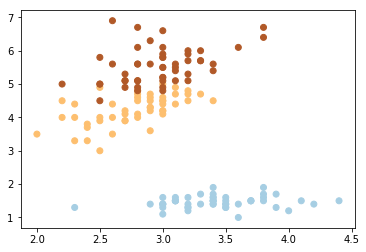

In [77]:
plt.scatter(X[:,0],X[:,1],cmap="Paired",c=Y)

In [78]:
#建函數學習機
clf = SVC(gamma = "auto")

In [79]:
#訓練
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
#預測
y_predict = clf.predict(x_test)

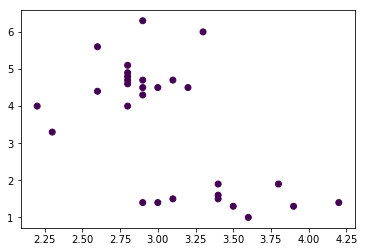

In [81]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict-y_test)

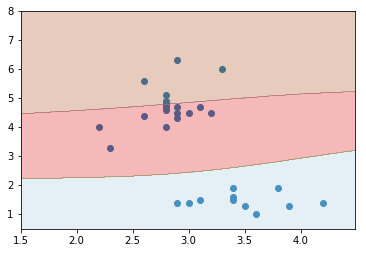

In [82]:
x0 = np.arange(1.5,4.5,0.01)
y0 = np.arange(0.5,8,0.01)

xm,ym =np.meshgrid(x0,y0)
P = np.c_[xm.ravel(),ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)

plt.scatter(x_test[:,0],x_test[:,1],cmap = "Paired")
plt.contourf(x0,y0,Z,cmap ="Paired",alpha = 0.3)